In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [200]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custom_activation(x):
    return (K.sigmoid(x*100))

In [335]:
init = RandomUniform(minval=-6, maxval=6)

model = Sequential()
model.add(Dense(20, activation='tanh', input_shape=(3,), kernel_initializer=init, bias_initializer=init))

model.add(Dense(20, activation='tanh', kernel_initializer=init, bias_initializer=init))
model.add(Dense(20, activation='tanh', kernel_initializer=init, bias_initializer=init))

model.add(Dense(1, activation=custom_activation))

In [336]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_206 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_207 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_208 (Dense)            (None, 1)                 21        
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


In [337]:
x_size = 1024
y_size = 1024

x = np.linspace(-6, 6, x_size)
y = np.linspace(-5, 5, y_size)

In [338]:
xy = np.meshgrid(x, y)

In [339]:
tensor_data = []

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        tensor_data.append([xi, yj , xi**3 + yj])
        
tensor_data = np.asarray(tensor_data)

In [340]:
model.input

<tf.Tensor 'dense_205_input:0' shape=(?, 3) dtype=float32>

In [341]:
tensor_data.shape

(1048576, 3)

In [342]:
output = model.predict(tensor_data)

In [343]:
reshaped = np.reshape(output, (x_size, y_size, 1))

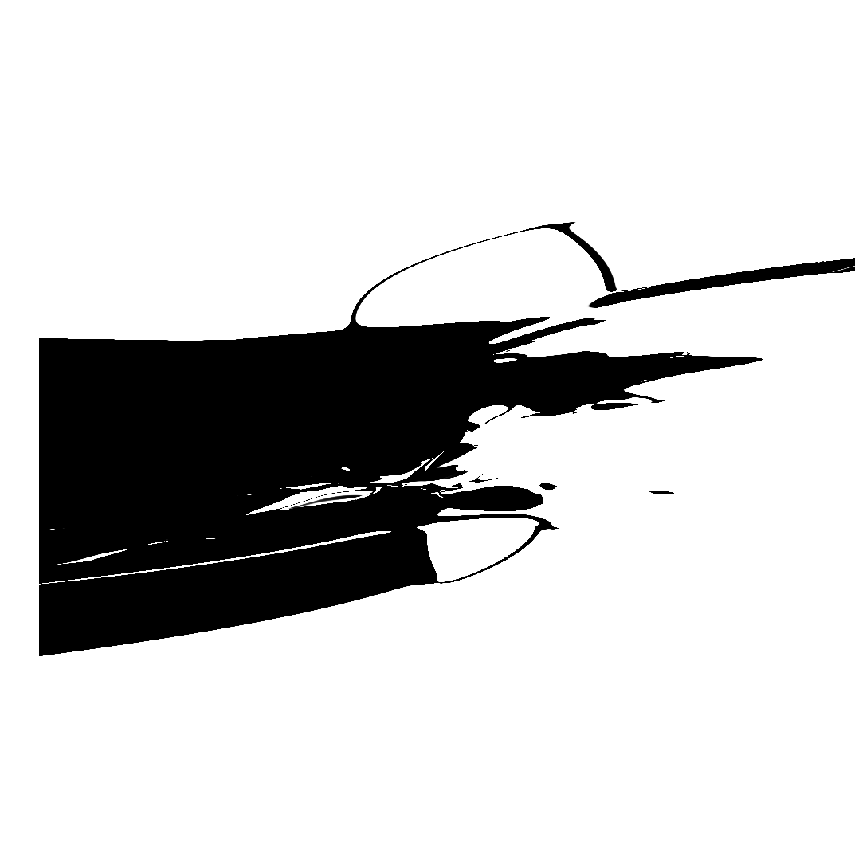

In [344]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(reshaped[:, :, 0], cmap='Greys')